# Manipulação de Dados - Parte 1

- Faça o download do dataset _ml-latest-small.zip_ do [_MovieLens_](https://grouplens.org/datasets/movielens/)
- Abra o arquivo _ratings.csv_ no excell e em um editor de texto
- Referência: https://www.kaggle.com/learn/pandas

## Analisando as notas de filmes

### Carregando um dataset

In [1]:
import pandas as pd

avaliacoes = pd.read_csv('datasets/ml-latest-small/ratings.csv')  # carrega/lê um arquivo csv
avaliacoes

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [2]:
type(avaliacoes)

pandas.core.frame.DataFrame

In [3]:
avaliacoes.head() # mostra as 5 primeiras linhas por padrão

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
avaliacoes.head(10)  # mostra as 10 primeiras linhas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [5]:
avaliacoes.shape  # retorna o formato da tabela (DataFrame)

(100836, 4)

In [6]:
print(f'A tabela (DataFrame) possui {avaliacoes.shape[0]} linhas (amostras/exemplos) e {avaliacoes.shape[1]} colunas (variáveis/atributos/características).')

A tabela (DataFrame) possui 100836 linhas (amostras/exemplos) e 4 colunas (variáveis/atributos/características).


### Alterando o nome das colunas/variáveis

In [7]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Salvando um dataset

In [8]:
avaliacoes.to_csv('ml-latest-small/avaliacoes.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ml-latest-small/avaliacoes.csv'

- Abra o arquivo _ml-latest-small/notas.csv_ no excell e em um editor de texto

### Tipo de Dados: DataFrame e Series

#### DataFrame
'Tabela' _bi-dimensional_, de tamanho mutável, com dados potencialmente heterogêneos.

In [10]:
type(avaliacoes)

pandas.core.frame.DataFrame

[Referência](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

##### Criando DataFrames

In [11]:
pesquisa_de_satisfacao = pd.DataFrame({
    'bom': [50, 21, 100],
    'ruim': [131, 2, 30],
    'pessimo': [30, 20, 1]
})

pesquisa_de_satisfacao.head()

,bom,ruim,pessimo
0,50,131,30
1,21,2,20
2,100,30,1


O índice 0 representa um dado produto avaliado, o índice 1 outro produto, e assim por diante.

Para informar melhor o produto, poderíamos adicionar uma Coluna chamado `produto`:

In [12]:
pesquisa_de_satisfacao = pd.DataFrame({
    'produto': ['Xbox One', 'Playstation 4', 'Switch'],
    'bom': [50, 21, 100],
    'ruim': [131, 2, 30],
    'pessimo': [30, 20, 1]
})

pesquisa_de_satisfacao.head()

,produto,bom,ruim,pessimo
0,Xbox One,50,131,30
1,Playstation 4,21,2,20
2,Switch,100,30,1


Ou ainda, usar os produtos como **índices** da tabela, ao invés de 0, 1, ...

In [13]:
pesquisa_de_satisfacao = pd.DataFrame({
    'bom': [50, 21, 100],
    'ruim': [131, 2, 30],
    'pessimo': [30, 20, 1]
}, index=['XboxOne', 'Playstation4', 'Switch'])

pesquisa_de_satisfacao.head()

,bom,ruim,pessimo
XboxOne,50,131,30
Playstation4,21,2,20
Switch,100,30,1


Transformando uma coluna nos **índices** da tabela

In [14]:
# cria uma cópia do DataFrame e 'seta' a coluna 'momento' como os índices
avaliacoes_copia = avaliacoes.set_index('momento')
avaliacoes_copia.head()

,usuarioId,filmeId,nota
momento,,,
964982703,1,1,4.0
964981247,1,3,4.0
964982224,1,6,4.0
964983815,1,47,5.0
964982931,1,50,5.0


#### Series
Array uni-dimensional com os dados e rótulos de um eixo.

In [15]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [17]:
avaliacoes.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [18]:
type(avaliacoes.nota)

pandas.core.series.Series

#### Criando uma Series

In [19]:
pd.Series([30, 35, 40])  # usa os índices númericos padrão para os elementos da Series

0    30
1    35
2    40
dtype: int64

In [20]:
pd.Series([30, 35, 40], index=['Vendas_2018', 'Vendas_2019', 'Vendas_2020'])  # atribui rótulos para os índices dos elementos

Vendas_2018    30
Vendas_2019    35
Vendas_2020    40
dtype: int64

In [21]:
pd.Series([30, 35, 40], index=['Vendas_2018', 'Vendas_2019', 'Vendas_2020'], name='Xbox One')

Vendas_2018    30
Vendas_2019    35
Vendas_2020    40
Name: Xbox One, dtype: int64

In [22]:
pd.Series([30, 35, 40], index=['Vendas_2018', 'Vendas_2019', 'Vendas_2020'], name='Xbox One').to_frame()  # transforma uma Series em um DataFrame

,Xbox One
Vendas_2018,30
Vendas_2019,35
Vendas_2020,40


### Indexação

In [23]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
avaliacoes[0]  # tentar acessar a linha 0 assim NÃO FUNCIONA

KeyError: 0

In [25]:
avaliacoes.nota[0]  # retorna a nota da linha de índice 0

4.0

#### Index-based selection (seleção baseada em Índices)

Mostrando linhas específicas de um DataFrame:

`iloc`: seleciona elementos do Dataframe, baseado em seu **índice** (número) --> row-first, column-second

In [26]:
print(avaliacoes.head())
print('')
print(avaliacoes.iloc[0])  # retorna a linha [0]

   usuarioId  filmeId  nota    momento
0          1        1   4.0  964982703
1          1        3   4.0  964981247
2          1        6   4.0  964982224
3          1       47   5.0  964983815
4          1       50   5.0  964982931

usuarioId            1.0
filmeId              1.0
nota                 4.0
momento      964982703.0
Name: 0, dtype: float64


In [27]:
avaliacoes.iloc[3]  # retorna as linhas de índice de 0 a 4

usuarioId            1.0
filmeId             47.0
nota                 5.0
momento      964983815.0
Name: 3, dtype: float64

In [28]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [29]:
avaliacoes.iloc[:5]

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [30]:
avaliacoes.iloc[0, 2]  # retorna o elemento da coluna 2 ('nota') para a linha 0

4.0

In [31]:
avaliacoes.iloc[:, 2]  # retorna todas as linhas, mostrando apenas a coluna 2 ('nota')

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [32]:
avaliacoes

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [33]:
avaliacoes.iloc[:5, 2]  # retorna as 5 primeiras linhas (índices no intervalo [0, 5)), mostando apenas a coluna 2

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [34]:
avaliacoes.iloc[[1, 4, 100833]]  # retona as linhas 1, 4 e 100833

,usuarioId,filmeId,nota,momento
1,1,3,4.0,964981247
4,1,50,5.0,964982931
100833,610,168250,5.0,1494273047


#### Label-based selection (seleção baseadas em Rótulos)

`loc`: seleciona elementos do Dataframe, baseado em seus **rótulos** --> row-first, column-second

In [35]:
pesquisa_de_satisfacao.head()

,bom,ruim,pessimo
XboxOne,50,131,30
Playstation4,21,2,20
Switch,100,30,1


In [36]:
pesquisa_de_satisfacao.iloc[0]  # retorna a linha de índice 0

bom         50
ruim       131
pessimo     30
Name: XboxOne, dtype: int64

In [37]:
pesquisa_de_satisfacao.loc['XboxOne']  # retorna a linha cujo o rótulo é 'XboxOne'

bom         50
ruim       131
pessimo     30
Name: XboxOne, dtype: int64

In [38]:
pesquisa_de_satisfacao.iloc['XboxOne']

TypeError: Cannot index by location index with a non-integer key

In [39]:
pesquisa_de_satisfacao.loc['XboxOne', 'ruim']  # retorna o valor da coluna 'ruim' da linha cujo o rótulo é 'XboxOne'

131

In [40]:
type(pesquisa_de_satisfacao.iloc[0])

pandas.core.series.Series

In [41]:
pesquisa_de_satisfacao.iloc[0]['ruim']

131

In [42]:
pesquisa_de_satisfacao.iloc[0].ruim

131

In [43]:
pesquisa_de_satisfacao.loc[['XboxOne', 'Switch']]

,bom,ruim,pessimo
XboxOne,50,131,30
Switch,100,30,1


In [44]:
pesquisa_de_satisfacao.loc[:, ['bom', 'pessimo']]

,bom,pessimo
XboxOne,50,30
Playstation4,21,20
Switch,100,1


#### ===> ATENÇÃO

### Outras maneiras de acesso

In [45]:
print(avaliacoes.head())
print(f'\navaliacoes.nota[0] = {avaliacoes.nota[0]}')
print(f'\navaliacoes.nota[3] = {avaliacoes.nota[3]}')

   usuarioId  filmeId  nota    momento
0          1        1   4.0  964982703
1          1        3   4.0  964981247
2          1        6   4.0  964982224
3          1       47   5.0  964983815
4          1       50   5.0  964982931

avaliacoes.nota[0] = 4.0

avaliacoes.nota[3] = 5.0


In [46]:
print(avaliacoes.head())
print('')
print(avaliacoes.nota[:5])

   usuarioId  filmeId  nota    momento
0          1        1   4.0  964982703
1          1        3   4.0  964981247
2          1        6   4.0  964982224
3          1       47   5.0  964983815
4          1       50   5.0  964982931

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64


In [47]:
avaliacoes.nota[3] = 99
avaliacoes.head()

<ipython-input-47-3386ec406198>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliacoes.nota[3] = 99


,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,99.0,964983815
4,1,50,5.0,964982931


De acordo com a documentação, o código acima funciona, mas pode acarretar em:
1. Problema de performance;
2. Não há garantias que o Pandas retornará sempre uma **view** (referência). Às vezes, ele pode retornar uma **cópia**

#### Alternativas (mais rápidas e mais seguras)

In [48]:
avaliacoes.at[3, 'nota'] = 5.0  # forma mais segura
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [49]:
avaliacoes.loc[3, 'nota'] = 55
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,55.0,964983815
4,1,50,5.0,964982931


In [50]:
avaliacoes.iloc[3, 2] = 5.0
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### Mais um pouco sobre data assignment (atribuição de dados)

In [51]:
avaliacoes_copia = avaliacoes.copy()  # copia o DataFrame em outra variável
avaliacoes_copia.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [52]:
avaliacoes == avaliacoes_copia

,usuarioId,filmeId,nota,momento
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
100831,True,True,True,True
100832,True,True,True,True
100833,True,True,True,True
100834,True,True,True,True


In [53]:
avaliacoes_copia.nota = 1.0  # atribui o valor 1.0 para todas as notas do DataFrame avaliacoes_copia
avaliacoes_copia.head()

,usuarioId,filmeId,nota,momento
0,1,1,1.0,964982703
1,1,3,1.0,964981247
2,1,6,1.0,964982224
3,1,47,1.0,964983815
4,1,50,1.0,964982931


In [54]:
avaliacoes.head()  # não alterou o Dataframe original

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [55]:
avaliacoes_copia.nota = range(len(avaliacoes_copia))  # atribui, para cada linha de índice [i], a nota no valor de i
avaliacoes_copia

,usuarioId,filmeId,nota,momento
0,1,1,0,964982703
1,1,3,1,964981247
2,1,6,2,964982224
3,1,47,3,964983815
4,1,50,4,964982931
...,...,...,...,...
100831,610,166534,100831,1493848402
100832,610,168248,100832,1493850091
100833,610,168250,100833,1494273047
100834,610,168252,100834,1493846352


In [56]:
avaliacoes_copia.nota = avaliacoes.nota  # atribui, linha a linha, as notas do Dataframe `avaliacoes` para `avaliacoes_copia`
avaliacoes_copia

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### Seleção Condicional

In [57]:
avaliacoes.usuarioId == 1  # retorna uma Series de booleans, com o número de linhas do Dataframe, que informa quais linhas possuem usuarioId == 1

0          True
1          True
2          True
3          True
4          True
          ...  
100831    False
100832    False
100833    False
100834    False
100835    False
Name: usuarioId, Length: 100836, dtype: bool

In [58]:
avaliacoes[avaliacoes.usuarioId == 1]  # retorna um Dataframe apenas com as linhas do usuarioId == 1

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [59]:
avaliacoes.loc[avaliacoes.usuarioId == 1]  # retorna um Dataframe apenas com as linhas do usuarioId == 1

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


`query` filtra linhas de um _DataFrame_ baseado em uma **query** (pergunta).

In [60]:
avaliacoes.query('usuarioId == 1') # retorna um Dataframe apenas com as linhas do usuarioId == 1

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [61]:
avaliacoes[(avaliacoes.usuarioId == 1) & (avaliacoes.nota >= 4.0)]  # retorna as avaliações do usuarioId == 1 que tiveram notas >= 4.0
# note o uso de um único &

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [62]:
avaliacoes.loc[(avaliacoes.usuarioId == 1) & (avaliacoes.nota >= 4.0)]  # retorna as avaliações do usuarioId == 1 que tiveram notas >= 4.0
# note o uso de um único &

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [63]:
avaliacoes.query('usuarioId==1 and nota >= 4.0')  # retorna as avaliações do usuarioId == 1 que tiveram notas >= 4.0

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [64]:
avaliacoes[(avaliacoes.usuarioId == 1) | (avaliacoes.usuarioId == 2)]  # retorna as avaliações do usuarioId == 1 ou 2
# note o uso de um único |

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
256,2,112552,4.0,1445714882
257,2,114060,2.0,1445715276
258,2,115713,3.5,1445714854
259,2,122882,5.0,1445715272


In [65]:
avaliacoes.loc[(avaliacoes.usuarioId == 1) | (avaliacoes.usuarioId == 2)]  # retorna as avaliações do usuarioId == 1 ou 2
# note o uso de um único |

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
256,2,112552,4.0,1445714882
257,2,114060,2.0,1445715276
258,2,115713,3.5,1445714854
259,2,122882,5.0,1445715272


In [66]:
avaliacoes.query('usuarioId==1 or usuarioId==2')  # retorna as avaliações do usuarioId == 1 que tiveram notas >= 4.0

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
256,2,112552,4.0,1445714882
257,2,114060,2.0,1445715276
258,2,115713,3.5,1445714854
259,2,122882,5.0,1445715272


In [67]:
avaliacoes[avaliacoes.usuarioId.isin([1, 3])]  # retorna um Dataframe com as avalições dos usuários 1 e 3

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
295,3,7899,4.5,1306464036
296,3,7991,5.0,1306463684
297,3,26409,4.5,1306463993
298,3,70946,5.0,1306463815


In [68]:
avaliacoes.loc[avaliacoes.usuarioId.isin([1, 3])]  # retorna um Dataframe com as avalições dos usuários 1 e 3

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
295,3,7899,4.5,1306464036
296,3,7991,5.0,1306463684
297,3,26409,4.5,1306463993
298,3,70946,5.0,1306463815


In [69]:
avaliacoes.query('usuarioId in [1, 3]')  # retorna um Dataframe com as avaliações dos usuários 1 e 3

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
295,3,7899,4.5,1306464036
296,3,7991,5.0,1306463684
297,3,26409,4.5,1306463993
298,3,70946,5.0,1306463815


In [70]:
lista_de_indices = [1, 3]
avaliacoes.loc[avaliacoes.usuarioId.isin(lista_de_indices)]  # retorna um Dataframe com as avaliações dos usuários 1 e 3

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
295,3,7899,4.5,1306464036
296,3,7991,5.0,1306463684
297,3,26409,4.5,1306463993
298,3,70946,5.0,1306463815


In [71]:
lista_de_indices = [1, 3]
avaliacoes.query('usuarioId in @lista_de_indices')  # retorna um Dataframe com as avaliações dos usuários 1 e 3

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
295,3,7899,4.5,1306464036
296,3,7991,5.0,1306463684
297,3,26409,4.5,1306463993
298,3,70946,5.0,1306463815


### Iterando com DataFrames

#### For-each `DataFrame.iterrows()` (LENTO ==> apenas indicado para iterar pequenos conjunto de dados)

In [72]:
for index, row in avaliacoes.head(10).iterrows():
    print(f'indice: {index}, {row["nota"]}')

indice: 0, 4.0
indice: 1, 4.0
indice: 2, 4.0
indice: 3, 5.0
indice: 4, 5.0
indice: 5, 3.0
indice: 6, 5.0
indice: 7, 4.0
indice: 8, 5.0
indice: 9, 5.0


#### Alternativas
https://stackoverflow.com/a/55557758/7069696 <br/>
https://gist.github.com/Coldsp33d/948f96b384ca5bdf6e8ce203ac97c9a0

<img src="imagens/iteration-benchmark.png" width='50%' />

## Primeiras visualizações

### Visualizando frequências

In [73]:
avaliacoes

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [74]:
sorted(avaliacoes.nota.unique())  # retorna os dados únicos da série

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [75]:
avaliacoes.nota.value_counts() # conta o número de ocorrências de cada valor da série (cada nota)

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

<br/>Que tal analisarmos essa **frequência de valores** de forma _visual_?

In [76]:
avaliacoes.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

<AxesSubplot:>

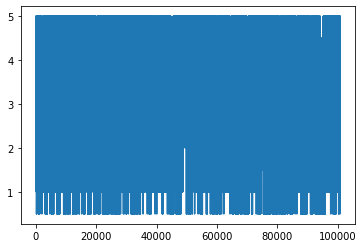

In [77]:
avaliacoes.nota.plot()  # por padrão, plota um gráfico de linhas

<AxesSubplot:>

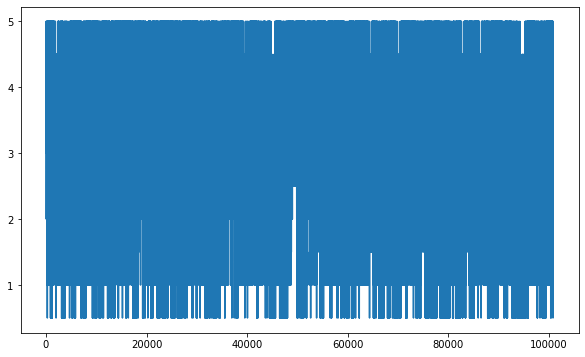

In [78]:
avaliacoes.nota.plot(figsize=(10,6))  # 10 polegadas de largura e 6 polegadas de altura

Por *padrão*, o _plot_ plota um **line plot (gráfico de linhas)**, que é inútil para nosso caso (análise de frequência).

O que desejamos visualizar é, na verdade, um **Histograma** (distribuição de frequências):

<AxesSubplot:ylabel='Frequency'>

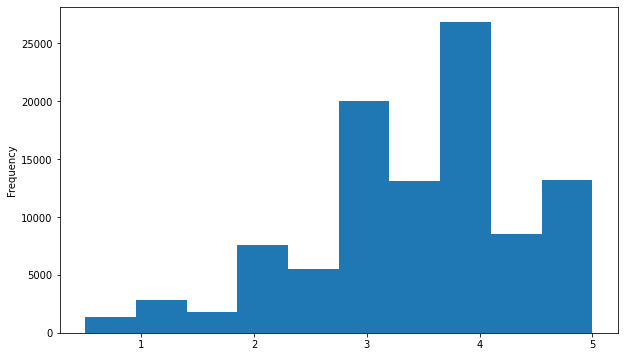

In [79]:
avaliacoes.nota.plot(kind='hist', figsize=(10,6))

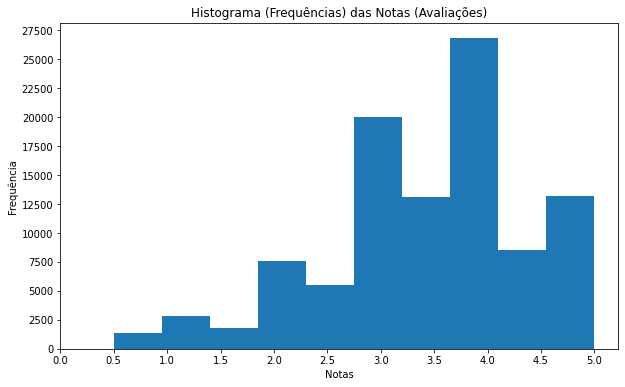

In [80]:
ax = avaliacoes.nota.plot(kind='hist', figsize=(10,6))

ax.set_title('Histograma (Frequências) das Notas (Avaliações)')

ax.set_xlabel('Notas')
ax.set_ylabel('Frequência')

ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
ax.set_yticks([0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500])

<br/>Por padrão, o _Pandas_ utiliza a biblioteca **Matplolib** para a geração dos gráficos.

#### Algumas medidas descritivas

In [86]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [81]:
print(f'min = {avaliacoes.nota.min()}, max = {avaliacoes.nota.max()}')

min = 0.5, max = 5.0


In [82]:
avaliacoes.nota.mean()

3.501556983616962

In [83]:
avaliacoes.nota.std()

1.042529239060635

In [84]:
avaliacoes.nota.median()

3.5

In [85]:
avaliacoes.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

#### Quartil

**Ex 1)** Lista com número **ímpar** de elementos.

<img src="imagens/quartile/quartile_impar.png" style="width: 50%;"/>

**Solução:**
<img src="imagens/quartile/quartile_impar_solucao.png" style="width: 50%;"/>

**Ex 2)** Lista com número **par** de elementos.

<img src="imagens/quartile/quartile_par.png" style="width: 50%;"/>

**Solução:**

<img src="imagens/quartile/quartile_par_solucao.png" style="width: 50%;"/>

#### Box plot

<img src="imagens/boxplot.jpg" style="width:50%;"/>

<img src="imagens/boxplot_with_outliers.png" style="width: 50%;"/>

In [89]:
avaliacoes

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


/Users/hisamuka/yeah/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

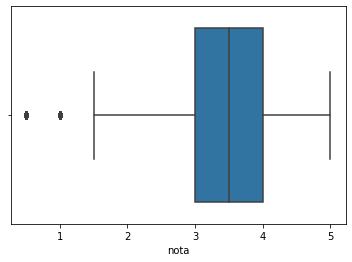

In [91]:
import seaborn as sns
sns.boxplot(avaliacoes['nota'])

/Users/hisamuka/yeah/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


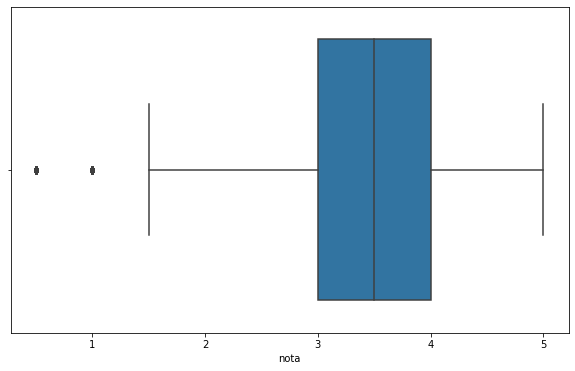

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(avaliacoes.nota)

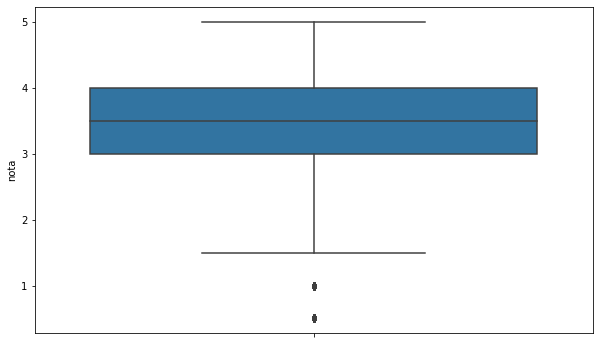

In [95]:
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(y=avaliacoes.nota)

## Vamos analisar mais os filmes

In [97]:
filmes = pd.read_csv('datasets/ml-latest-small/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [98]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Analisando as notas de alguns filmes específicos


`query` filtra linhas de um _DataFrame_ baseado em uma **query** (pergunta).

In [106]:
avaliacoes.query('filmeId == 1').nota.mean()  # média das notas do Toy Story

3.9209302325581397

In [109]:
num_de_avaliacoes_do_toy_story = avaliacoes.query('filmeId == 1').shape[0]
num_de_avaliacoes_do_toy_story

215

In [114]:
boas_notas_do_toy_story = avaliacoes.query('filmeId == 1 and nota >= 4').shape[0]
boas_notas_do_toy_story

print(f'Porcentagem de boas notas do Toy Story: {boas_notas_do_toy_story / num_de_avaliacoes_do_toy_story}')

Porcentagem de boas notas do Toy Story: 0.6837209302325581


In [116]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [120]:
avaliacoes.query('filmeId == 2').nota.mean()

3.4318181818181817

### Como se distribuem as notas médias de cada filme?

In [123]:
avaliacoes

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [131]:
avaliacoes.groupby('filmeId').mean().nota

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [132]:
type(avaliacoes.groupby('filmeId').mean().nota)  # ==> Series

pandas.core.series.Series

In [138]:
avaliacoes.groupby('filmeId').mean().loc[:, ['nota']]

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [141]:
avaliacoes.groupby('filmeId').mean().nota.to_frame()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [143]:
medias_por_filme = avaliacoes.groupby('filmeId').mean().nota
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

<AxesSubplot:ylabel='Frequency'>

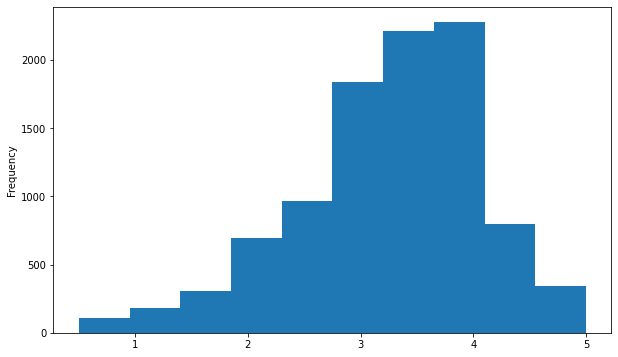

In [146]:
medias_por_filme.plot(kind='hist', figsize=(10, 6))  # plot do pandas

<Figure size 720x432 with 0 Axes>

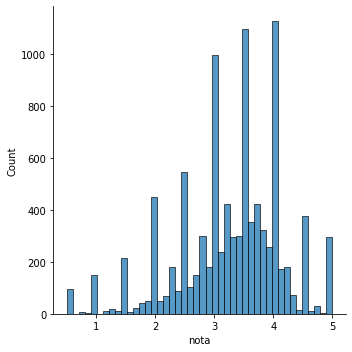

In [150]:
plt.figure(figsize=(10, 6))
sns.displot(medias_por_filme)  # o número de bins desse histograma é diferente do
                               # número de bins do histograma anterior

/Users/hisamuka/yeah/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

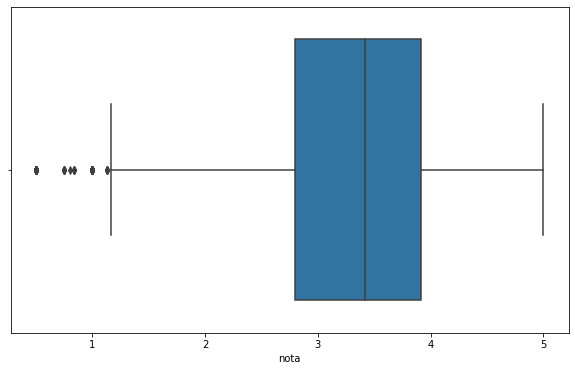

In [153]:
plt.figure(figsize=(10, 6))
sns.boxplot(medias_por_filme)

#### Combinandos DataFrames

In [155]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [157]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [161]:
filmes_com_indice_filmeId = filmes.set_index('filmeId')

In [165]:
avaliacoes_com_titulosavaliacoes_com_titulos = avaliacoes.join(filmes_com_indice_filmeId, on='filmeId')
avaliacoes_com_titulos

,usuarioId,filmeId,nota,momento,titulo,generos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [166]:
avaliacoes_com_titulos.query('filmeId == 1')

,usuarioId,filmeId,nota,momento,titulo,generos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
516,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
874,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1434,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1667,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
97364,606,1,2.5,1349082950,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
98479,607,1,4.0,964744033,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
98666,608,1,2.5,1117408267,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
99497,609,1,3.0,847221025,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [169]:
avaliacoes_com_titulos[avaliacoes_com_titulos.filmeId == 1]

,usuarioId,filmeId,nota,momento,titulo,generos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
516,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
874,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1434,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1667,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
97364,606,1,2.5,1349082950,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
98479,607,1,4.0,964744033,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
98666,608,1,2.5,1117408267,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
99497,609,1,3.0,847221025,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [173]:
selecao = avaliacoes_com_titulos.titulo.str.startswith('Toy Story (')
avaliacoes_com_titulos[selecao]

,usuarioId,filmeId,nota,momento,titulo,generos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
516,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
874,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1434,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1667,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
97364,606,1,2.5,1349082950,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
98479,607,1,4.0,964744033,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
98666,608,1,2.5,1117408267,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
99497,609,1,3.0,847221025,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [176]:
selecao = avaliacoes_com_titulos.titulo.str.contains('tory')
avaliacoes_com_titulos[selecao]

,usuarioId,filmeId,nota,momento,titulo,generos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
60,1,1073,5.0,964981680,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical
140,1,2161,5.0,964981710,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy
147,1,2329,5.0,964983263,American History X (1998),Crime|Drama
201,1,3053,5.0,964984086,"Messenger: The Story of Joan of Arc, The (1999)",Drama|War
...,...,...,...,...,...,...
100148,610,36850,4.5,1479542366,Police Story 2 (Ging chaat goo si juk jaap) (1...,Action|Comedy|Crime|Thriller
100149,610,36931,3.5,1479542370,New Police Story (Xin jing cha gu shi) (2004),Action|Crime|Drama
100154,610,37733,4.0,1493845278,"History of Violence, A (2005)",Action|Crime|Drama|Thriller
100447,610,78499,5.0,1493846463,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX


In [177]:
avaliacoes_com_titulos.query('titulo.str.contains("tory")')

,usuarioId,filmeId,nota,momento,titulo,generos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
60,1,1073,5.0,964981680,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical
140,1,2161,5.0,964981710,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy
147,1,2329,5.0,964983263,American History X (1998),Crime|Drama
201,1,3053,5.0,964984086,"Messenger: The Story of Joan of Arc, The (1999)",Drama|War
...,...,...,...,...,...,...
100148,610,36850,4.5,1479542366,Police Story 2 (Ging chaat goo si juk jaap) (1...,Action|Comedy|Crime|Thriller
100149,610,36931,3.5,1479542370,New Police Story (Xin jing cha gu shi) (2004),Action|Crime|Drama
100154,610,37733,4.0,1493845278,"History of Violence, A (2005)",Action|Crime|Drama|Thriller
100447,610,78499,5.0,1493846463,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX


## Analisando tendências de filmes

### Analisando a distribuição das notas dos primeiros 5 filmes

In [185]:
# seleciona todas as linhas/exemplos cujo valor da coluna 'filmeId' está entre 1 e 5
avaliacoes_5_primeiros_filmes = avaliacoes_com_titulos.query('filmeId in (1,2,3,4,5)')
avaliacoes_5_primeiros_filmes

,usuarioId,filmeId,nota,momento,titulo,generos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
516,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
560,6,2,4.0,845553522,Jumanji (1995),Adventure|Children|Fantasy
561,6,3,5.0,845554296,Grumpier Old Men (1995),Comedy|Romance
...,...,...,...,...,...,...
98666,608,1,2.5,1117408267,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
98667,608,2,2.0,1117490786,Jumanji (1995),Adventure|Children|Fantasy
98668,608,3,2.0,1117504413,Grumpier Old Men (1995),Comedy|Romance
99497,609,1,3.0,847221025,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [187]:
# cheque se a filtragem acima funcionou ==> se só há linhas com valores de 1 a 5 para a coluna 'filmeId''
avaliacoes_5_primeiros_filmes.filmeId.unique()

array([1, 3, 2, 4, 5])

In [189]:
avaliacoes_5_primeiros_filmes.drop_duplicates(subset='filmeId')

,usuarioId,filmeId,nota,momento,titulo,generos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
560,6,2,4.0,845553522,Jumanji (1995),Adventure|Children|Fantasy
562,6,4,3.0,845554349,Waiting to Exhale (1995),Comedy|Drama|Romance
563,6,5,5.0,845553938,Father of the Bride Part II (1995),Comedy


In [194]:
avaliacoes_5_primeiros_filmes.groupby('filmeId').nota.describe()

,count,mean,std,min,25%,50%,75%,max
filmeId,,,,,,,,
1,215.0,3.920930,0.834859,0.5,3.50,4.0,4.5,5.0
2,110.0,3.431818,0.881713,0.5,3.00,3.5,4.0,5.0
3,52.0,3.259615,1.054823,0.5,3.00,3.0,4.0,5.0
4,7.0,2.357143,0.852168,1.0,1.75,3.0,3.0,3.0
5,49.0,3.071429,0.907148,0.5,3.00,3.0,3.5,5.0


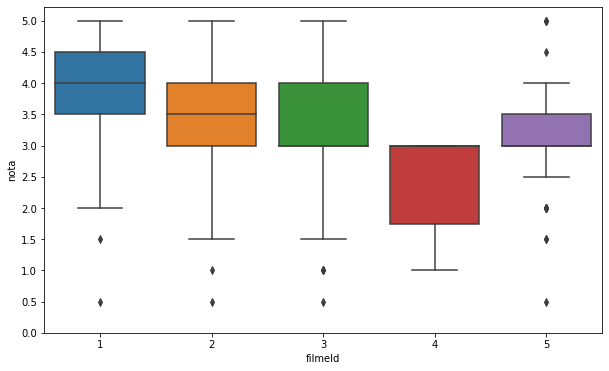

In [202]:
plt.figure(figsize=(10, 6))
boxplots = sns.boxplot(data=avaliacoes_5_primeiros_filmes, x='filmeId', y='nota')

# yticks = [0, 0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

import numpy as np
yticks = np.arange(0, 5.0001, 0.5)
boxplots.set_yticks(yticks)

### Médias x Medianas
Ambas são **Medidas de Tendência Central**.

Ex: Notas de alunos (n=8): [2.5, 7, 7, 7.2, 7.7, 8.3, 8.5, 9].

Desenhe a distribuição e explique cada um dos pontos abaixo.

- **Média:**
  + Sensível a _outliers_ (ruídos)
  + Centro de massa dos dados (Ponto central de equilíbrio/balanço)
- **Média "aparada" (Trimmed Mean)**:
  + Média depois de remover x% de valores extremos da distribuição (frequentemente, outliers)
- **Mediana:**
  + Valor central após ordenação dos dados (divide a quantidade de dados ao meio)
  + Não é sensível a outliers

In [206]:
notas_alunos = np.array([2.5, 7, 7, 7.2, 7.7, 8.3, 8.5, 9])
np.mean(notas_alunos), np.median(notas_alunos)

(7.15, 7.45)

In [208]:
# trimmed mean and median
notas_alunos = np.array([7, 7, 7.2, 7.7, 8.3, 8.5, 9])
np.mean(notas_alunos), np.median(notas_alunos)

(7.814285714285715, 7.7)

### Comparando médias

Compare as médias dos dois primeiros filmes do dataset (filmeId = [1, 2])

In [213]:
avaliacoes_toy_story = avaliacoes_com_titulos.query('filmeId == 1')
avaliacoes_toy_story

,usuarioId,filmeId,nota,momento,titulo,generos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
516,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
874,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1434,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1667,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
97364,606,1,2.5,1349082950,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
98479,607,1,4.0,964744033,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
98666,608,1,2.5,1117408267,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
99497,609,1,3.0,847221025,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [215]:
avaliacoes_jumanji = avaliacoes_com_titulos[avaliacoes_com_titulos.filmeId == 2]
avaliacoes_jumanji

,usuarioId,filmeId,nota,momento,titulo,generos
560,6,2,4.0,845553522,Jumanji (1995),Adventure|Children|Fantasy
1026,8,2,4.0,839463806,Jumanji (1995),Adventure|Children|Fantasy
1773,18,2,3.0,1455617462,Jumanji (1995),Adventure|Children|Fantasy
2275,19,2,3.0,965704331,Jumanji (1995),Adventure|Children|Fantasy
2977,20,2,3.0,1054038313,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...,...
95102,600,2,4.0,1237764627,Jumanji (1995),Adventure|Children|Fantasy
95965,602,2,4.0,840875851,Jumanji (1995),Adventure|Children|Fantasy
97044,604,2,5.0,832080293,Jumanji (1995),Adventure|Children|Fantasy
97144,605,2,3.5,1277176522,Jumanji (1995),Adventure|Children|Fantasy


In [218]:
print(f'A nota média do Toy Story é: {avaliacoes_toy_story.nota.mean():.2f}')
print(f'A nota média do Jumanji é: {avaliacoes_jumanji.nota.mean():.2f}')

A nota média do Toy Story é: 3.92
A nota média do Jumanji é: 3.43


<br/>
Apenas analisando a média, podemos pensar que a avaliação dos dois filmes não são tão diferentes assim. <br/>
Mas, isso é a **média**: estamos resumindo todas as avaliações de todoas as pessoas em **apenas um valor**. <br/>
Só olhando para esta média, não temos noção da distribuição das notas:
- Quantas pessoas odiaram e realmente gostaram do filme?
- A diferença entre pessoas que amaram e odiaram o filme é muito grande?

Ao resumir todas as notas em apenas um valor **médio**, perdemos essa noção da distribuição dos valores, o que é extremamente importante para nossa análise.

Tanto a **média** quanto a **mediana** são valores que nos mostram para onde está a **tendência/corportamento _central_** das nossas distribuições (dados).

#### Problema de só se usar a média

In [221]:
notas_filme_A = [2.5] * 10
notas_filme_A.extend([3.5] * 10)
notas_filme_A

[2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5]

In [224]:
notas_filme_A = np.append([2.5] * 10, [3.5] * 10)
notas_filme_A

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [226]:
notas_filme_B = np.append([1] * 10, [5] * 10)
notas_filme_B

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [229]:
print(f'A nota média do filme A é: {notas_filme_A.mean()}')
print(f'A nota média do filme B é: {notas_filme_B.mean()}')

A nota média do filme A é: 3.0
A nota média do filme B é: 3.0


Note que as média dos dois filmes é **a mesma**, porém o Filme B foi muito **mais controverso** para os avaliadores do que o Filme A. <br/>
Olhando apenas para a média, perdemos essa percepção da distribuição dos dados.

A mesma coisa acontece para as **medianas**.

In [231]:
print(f'A mediana do filme A é: {np.median(notas_filme_A)}')
print(f'A mediana do filme B é: {np.median(notas_filme_B)}')

A mediana do filme A é: 3.0
A mediana do filme B é: 3.0


O que fizemos, até o momento, foi aplicar diferentes _visualizações_ para tentar capturar/entender estas distribuições.

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

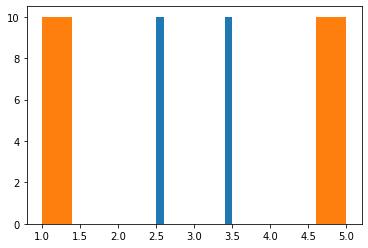

In [233]:
plt.hist(notas_filme_A)
plt.hist(notas_filme_B)

{'whiskers': [<matplotlib.lines.Line2D at 0x12822cb20>,
 'caps': [<matplotlib.lines.Line2D at 0x128250f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x128247370>,
 'medians': [<matplotlib.lines.Line2D at 0x12822ac10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1282410a0>,
 'means': []}

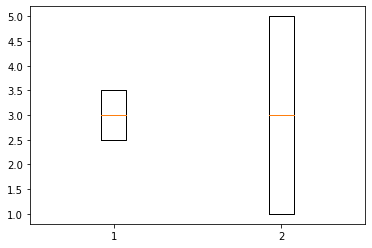

In [234]:
plt.boxplot([notas_filme_A, notas_filme_B])

### Desvio Padrão: O quanto, por padrão, os dados estão desviando da média?

O **desvio padrão** é um medida da _dispersão/variação_ de um conjunto de valores. <br/>
Um desvio padrão **baixo** indica que os valores tender a _estar perto_ da **média (valor esperado, esperança)**. do conjunto. <br/>
Um desvio padrão **alto** indica que os valores estão _espalhados ao longo de um intervalo maior_.

<img src="imagens/std/std.png" width="50%" />

- Calcule o desvio padrão para o conjunto: [5, 2, 1, 3, 4, 3]

In [235]:
np.std([5, 2, 1, 3, 4, 3])

1.2909944487358056

#### Regra 68, 95, 99.7
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Empirical_rule_histogram.svg/450px-Empirical_rule_histogram.svg.png" >

#### De volta aos filmes A e B

In [237]:
print(f'Média filme A: {notas_filme_A.mean()} ± {notas_filme_A.std()}')
print(f'Média filme B: {notas_filme_B.mean()} ± {notas_filme_B.std()}')

Média filme A: 3.0 ± 0.5
Média filme B: 3.0 ± 2.0


### Formas Comuns de Distribuições

<img src='imagens/ShapesOfDistributions.jpg' width='50%' />

Referência: https://bixutoxypic.maxiwebagadir.com/shapes-of-distribution-9343hs.html

<br/>
Qual forma é esperada para as seguintes distribuições:

- Salários no Brasil: **Skewed right**
- Altura de adultos: **Symmetric (Normal)**
- Notas de alunos: **Skewed right or left** (mas, pode ser diferente também, depende da turma)

# Exercícios

#### 1. Quais são as notas mínimas, máximas e a a média das comédias?

#### 2. Quantos filmes cada usuário avaliou?

#### 3. Como se distribuem as médias das notas para cada avaliador/usuário?